# SI 650 Homework 1
Chenyun Tao
uniq: cyuntao

## Q2 Text Data Analyses

In [1]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
with open('stoplist.txt', 'r') as file:
    stoplist = file.read().splitlines()

In [4]:
with open('si650-f21-reddit-questions.txt', 'r', encoding='utf-8') as file:
    reddit = file.read()

In [5]:
with open('si650.f21.wiki-bios.10k.txt', 'r', encoding='utf-8') as file:
    wiki = file.read()

1. 

Before tokenizing the text, I decide to lower-case the words, since words with different cases are mostly the same.

In [6]:
reddit_doc = list(nlp.pipe(reddit.lower().splitlines()))

In [7]:
wiki_doc = list(nlp.pipe(wiki.lower().splitlines()))

In [8]:
def nostopList(doc):
    nostop_list = []
    for sentence in doc:
        nostop_list += [token.text for token in sentence if token.text not in stoplist and not token.is_punct]
    return nostop_list

Here I remove the punctuations as I think they could not be regarded as formal words.

In [9]:
reddit_nostop = nostopList(reddit_doc)

In [10]:
wiki_nostop = nostopList(wiki_doc)

In [11]:
def freqPlot(nostop_list, title):
    freq_count = pd.Series(nostop_list).value_counts()
    plt.loglog(np.arange(len(freq_count)), freq_count.values)
    plt.title('Frequency distribution of words in ' + title)
    plt.xlabel('Rank of word (log scale)')
    plt.ylabel('Word count (log scale)')

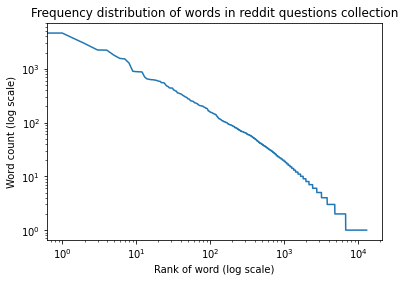

In [12]:
freqPlot(reddit_nostop, title='reddit questions collection')

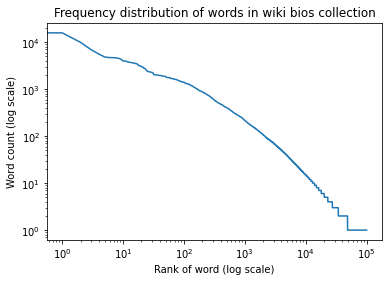

In [13]:
freqPlot(wiki_nostop, 'wiki bios collection')

Each plot looks like a power-law distribution, and the 2 distributions are similar.

2.

a)

In [14]:
def nopuncWords(doc):
    nopunc_list = list()
    for sentence in doc:
        nopunc_list += [token.text for token in sentence if not token.is_punct]
    return nopunc_list

In [15]:
reddit_nopunc = nopuncWords(reddit_doc)

In [16]:
wiki_nopunc = nopuncWords(wiki_doc)

In [17]:
len(reddit_nostop) / len(reddit_nopunc)

0.4271602691786542

In [18]:
len(wiki_nostop) / len(wiki_nopunc)

0.6017563970871147

Frequency of stopwords in the reddit collection is about 42.7%, which is smaller than the frequency of stopwords in the wiki collection, 60.2%. This is probably because reddit questions are usually much more brief than the wiki bios. As wiki bios is written in a more formal way, it is likely that wiki bios will include more stop words.

b)

In [19]:
def capPercentage(text):
    total_char = sum(1 for c in text)
    cap_char = sum(1 for c in text if c.isupper()) 
    return cap_char / total_char

In [20]:
capPercentage(reddit)

0.022969720672993812

In [21]:
capPercentage(wiki)

0.05142154768033748

Frequency of capital letters in the reddit collection is about 2.30%, which is smaller than the frequency of capital letters in the wiki collection, about 5.14%. This is probably because wiki bios are longer sentences, and since capital letters usually occur at the beginning of sentences, longer sentences will likely to result in lower percentage of the capital letters.

c)

In [22]:
def wordLen(nopunc_list):
    word_count = sum(1 for word in nopunc_list)
    total_len = sum(len(word) for word in nopunc_list)
    return total_len / word_count

In [23]:
wordLen(reddit_nopunc)

4.191684186241474

In [24]:
wordLen(wiki_nopunc)

4.73574797118178

The average number of characters per word in the reddit collection is about 4.19, which is shorter than the the average number of characters per word in the wiki collection, about 4.74. Again, this is probably because reddit questions are shorter and less formal than wiki bios.

d)

In [25]:
def posPercentage(doc):
    count_series = pd.Series({'NOUN': 0, 'ADJ': 0, 'VERB': 0, 'ADV': 0, 'PRON': 0})
    word_count = 0
    
    for sentence in doc:
        for token in sentence:
            if not token.is_punct:
                word_count += 1
                if token.pos_ in count_series.index:
                    count_series[token.pos_] += 1
    return count_series / word_count

In [26]:
posPercentage(reddit_doc)

NOUN    0.205267
ADJ     0.071597
VERB    0.148321
ADV     0.062112
PRON    0.168048
dtype: float64

In [27]:
posPercentage(wiki_doc)

NOUN    0.233081
ADJ     0.068700
VERB    0.098987
ADV     0.025724
PRON    0.048737
dtype: float64

Percentage of nouns, adjectives, verbs, adverbs, and pronouns in the reddit collection is about 20.5%, 7.2%, 14.8%, 6.2%, and 16.8%. Percentage of nouns, adjectives, verbs, adverbs, and pronouns in the wiki collection is about 23.3%, 6.9%, 9.9%, 2.6%, and 4.9%. There seem to be a much higher percentage of verbs, adverbs and pronouns, a slightly higher percentage of adjectives and a lower percentage of nouns in the reddit collection than in the wiki collection. Again, this is probably because words in reddit questions are less formal and shorter.

e)

In [28]:
from collections import Counter

In [29]:
def top10_nouns_verbs_adj(doc):
    word_series = pd.Series({'NOUN': [], 'ADJ': [], 'VERB': []})
    
    for sentence in doc:
        for token in sentence:
            if (not token.is_punct) and (token.pos_ in word_series.index):
                word_series[token.pos_].append(token.text)

    for each in word_series.index:
        top10words = Counter(word_series[each]).most_common(10)
        print("    the top 10 {}s are: ".format(each.lower()), end = '')
        for word, count in top10words:
            print(word + ',', end = ' ')
        print()

In [30]:
print("In the reddit collection, ")
top10_nouns_verbs_adj(reddit_doc)

In the reddit collection, 
    the top 10 nouns are: food, reddit, people, love, college, thing, life, time, redditors, story, 
    the top 10 adjs are: best, fast, serious, favorite, good, worst, other, first, most, weirdest, 
    the top 10 verbs are: love, have, do, ’s, be, loved, is, get, had, think, 


In [31]:
print("In the wiki collection, ")
top10_nouns_verbs_adj(wiki_doc)

In the wiki collection, 
    the top 10 nouns are: career, season, life, team, year, years, time, school, club, member, 
    the top 10 adjs are: first, early, second, new, other, national, high, international, personal, former, 
    the top 10 verbs are: born, was, played, became, made, had, won, died, served, began, 


We can see the top 10 nouns, adjs, and verbs in the reddit collection and in the wiki collection are quite different. Again, this is probably because the topics of reddit questions are quite different from the topics in wiki bios. For example, it is unsurprising that reddit is a common noun in the reddit collection, but not in wiki collection.

3.

In [32]:
idf_dict = {}
tf_dicts = []

for i in range(10):
    word_list = [token.text for token in wiki_doc[i] if (not token.is_punct) and (token.text not in stoplist)]
    tf_dict = {}
    for word, count in Counter(word_list).items():
        tf_dict[word] = np.log(count + 1)
        if word not in idf_dict:
            idf_dict[word] = set([i])
        else:
            idf_dict[word].add(i)
    tf_dicts.append(tf_dict)

for each in tf_dicts:
    for word, tf in each.items():
        each[word] = tf * (1 + np.log(10000 / len(idf_dict[word])))
    print(sorted(each, key=each.get, reverse=True)[:5])

['francesco', 'redenti', '1820–1876', 'italian', 'painter']
['1936', 'deacon', 'ice', 'hockey', 'winter']
['hugh', 'watlington', '1954', 'bermudian', 'windsurfer']
['ershad', 'party', '=', 'government', 'awami']
['m', 'jo', '임상조', '13', 'september']
['political', 'husayn', 'fawzi', 'al', 'najjar']
['football', 'played', 'notre', 'dame', 'american']
['reed', 'photographs', 'studio', 'work', 'northern']
['rugby', 'code', 'union', 'billy', 'moore']
['tomb', 'evrenos', 'giannitsa', 'greece', 'restoration']


In this question, I get rid of the stop words, since they are commonly used across each document. I think these words could be a good summary of the documents.

4.

Okapi/BM25 is another weighting that cannot be calculated directly from inverted index. As this weighting method needs to do document length normalization, the result could not be calculated directly from inverted index, but the advantage is that it could have a better performance for not so favoring long documents.

## Q4 Simple Search

1.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
with open('si650-f21-reddit-questions.txt', 'r', encoding='utf-8') as file:
    corpus = file.read().splitlines()

In [35]:
# A function that uses CountVectorizer to convert the Reddit questions corpus to vectors
def convertCorpus(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus).toarray()
    return (vectorizer, X)

In [36]:
# A function that given a new query, will return the 10 most similar reddit questions
def top10Similar(corpus, query):
    vectorizer, X = convertCorpus(corpus)
    y = vectorizer.transform(query).toarray()
    cos = np.asarray(cosine_similarity(X, y)).reshape(-1)
    # y = vectorizer.transform(query).toarray()[0]
    # cos = X.dot(y) / (np.sqrt(np.sum(X*X, axis=1))*np.sqrt(y.dot(y.T)))
    cosSeries = pd.Series(cos)
    idxs = cosSeries.sort_values(ascending=False).head(10).index.tolist()
    # idxs = np.argsort(cos)[-10:][::-1]
    result = [corpus[idx] for idx in idxs]
    return result

2. 

In [37]:
top10Similar(corpus, ['programming'])

['How to start programming?',
 'Java SE programming training',
 'How to start programming? What are important things i have to learn in programming?',
 'Where can i find programming podcast?',
 'Which language programming do you prefer?',
 'What is your best quotes about programming?',
 'Programmers, what do you like about programming?',
 'What is your favorite programming language and why?',
 'Is DNA an object-oriented life-programming language ?',
 'What programming language do you study at school?']

relevance status: [++, ++, ++, ++, ++, +, ++, ++, +, ++]  
NDCG: $\frac{DCG}{IDCG} = \frac{2 + \frac{2}{\log_2 2} + \frac{2}{\log_2 3} + \frac{2}{\log_2 4} + \frac{2}{\log_2 5} + \frac{1}{\log_2 6} + \frac{2}{\log_2 7} + \frac{2}{\log_2 8} + \frac{1}{\log_2 9} + \frac{2}{\log_2 10} }{2 + \sum_2^{10} \frac{2}{\log_2 i}} = 0.9332 $

In [38]:
top10Similar(corpus, ['pets'])

['Whats your pets name?',
 "What's your pets name?",
 'What’s your pets name??',
 "What's your pets name?",
 "What's your pets name?",
 '"People with pets on Reddit, What was the most Weirdest thing your pets did?"',
 'If there was a dating app for pets, what would your pets ‘Tell Us About Yourself’ be?',
 "redditors who have inadvertently gotten their pets high on some drug, what was your pets' reaction?",
 'What are the cleanest pets?',
 'Why do we love pets?']

relevance status: [++, ++, ++, ++, ++, ++, ++, ++, ++, ++]  
NDCG: $\frac{DCG}{IDCG} = 1$

In [39]:
top10Similar(corpus, ['college'])

['Fellow broke college students, how did you survive college?',
 'Current college students or college grads: What is (was) your favorite thing about going to college and being on campus?',
 'Paying for college',
 'College students/alumni, what actually helped you get through college?',
 'Choosing a college computer',
 'Is college a scam?',
 'Post college decisions',
 'College dropouts what finally made you give up on college?',
 'College dropouts what finally made you give up on college',
 'College Grads; Is the stress and frustration of college worth it?']

relevance status: [++, ++, ++, ++, +, ++, ++, ++, ++, ++]  
NDCG:  $\frac{DCG}{IDCG} = \frac{2 + \frac{2}{\log_2 2} + \frac{2}{\log_2 3} + \frac{2}{\log_2 4} + \frac{1}{\log_2 5} + \frac{2}{\log_2 6} + \frac{2}{\log_2 7} + \frac{2}{\log_2 8} + \frac{2}{\log_2 9} + \frac{2}{\log_2 10} }{2 + \sum_2^{10} \frac{2}{\log_2 i}} = 0.9590 $

In [40]:
top10Similar(corpus, ['love'])

['Love',
 'love',
 'love?',
 'Romantic love or mature love?',
 'Is online love real love?',
 'I love reddit.',
 'Dumb love',
 'Is "love" about "love" or "lover"?',
 'I love this',
 'Why love?']

relevance status: [++, ++, ++, ++, ++, +, ++, ++, +, ++]  
NDCG: $\frac{DCG}{IDCG} = \frac{2 + \frac{2}{\log_2 2} + \frac{2}{\log_2 3} + \frac{2}{\log_2 4} + \frac{2}{\log_2 5} + \frac{1}{\log_2 6} + \frac{2}{\log_2 7} + \frac{2}{\log_2 8} + \frac{1}{\log_2 9} + \frac{2}{\log_2 10} }{2 + \sum_2^{10} \frac{2}{\log_2 i}} = 0.9332 $

In [41]:
top10Similar(corpus, ['food'])

['Which food delivery is better Grab Food or Uber Food in Thailand?',
 'Send food',
 'Forever food',
 'Voodoo food',
 'food advice',
 'People in food service or food prep, have you ever spit in someone’s food?',
 'What food gave you the worst food poisoning?',
 'What are your favorite fast food/junk food items?',
 'Fast food, or food-related job employees of Reddit, what is/was the weirdest food combination a customer has ordered before?',
 'What type of food do usually eat as "struggle food"?']

relevance status: [++, ++, ++, ++, ++, +, ++, ++, ++, ++]  
NDCG: $\frac{DCG}{IDCG} = \frac{2 + \frac{2}{\log_2 2} + \frac{2}{\log_2 3} + \frac{2}{\log_2 4} + \frac{2}{\log_2 5} + \frac{1}{\log_2 6} + \frac{2}{\log_2 7} + \frac{2}{\log_2 8} + \frac{2}{\log_2 9} + \frac{2}{\log_2 10} }{2 + \sum_2^{10} \frac{2}{\log_2 i}} = 0.9632 $

3.

I think my IR system is doing an acceptable job. The IR systam could mostly retrieve questions that contain the exact words in the queries, so I think it would work well on queries with simple words whose meanings are clear. However, I think it will perform poorly on queries containing ambiguous words.

4. 

In [42]:
volLen = []

In [43]:
vectorizer500, _ = convertCorpus(corpus[:500])
volLen.append(len(vectorizer500.vocabulary_))

In [44]:
vectorizer1K, _ = convertCorpus(corpus[:1000])
volLen.append(len(vectorizer1K.vocabulary_))

In [45]:
vectorizer5K, _ = convertCorpus(corpus[:5000])
volLen.append(len(vectorizer5K.vocabulary_))

In [46]:
vectorizer10K, _ = convertCorpus(corpus[:10000])
volLen.append(len(vectorizer10K.vocabulary_))

In [47]:
vectorizer20K, _ = convertCorpus(corpus)
volLen.append(len(vectorizer20K.vocabulary_))

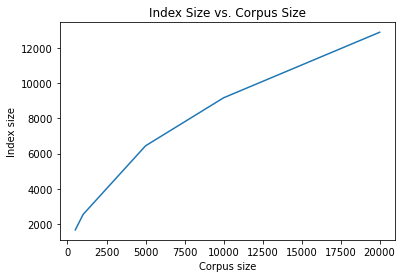

In [48]:
_ = sns.lineplot(x=[500, 1000, 5000, 10000, 20000], y=volLen).set(
    xlabel='Corpus size', ylabel='Index size', title='Index Size vs. Corpus Size')

I think this approach will not scale as we get more documents. From the plot, we can see that as the document size grows, the index size increases linearly. Then as the document size further grows, it is likely that the processing time will be much longer.